<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning/blob/main/%08week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10장:케라스를 사용한 인공신경망 소개

In [3]:
#iris의 꽃잎의 길이와 넓이를 그 꽃인지 아닌지 확인하는 코드

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
x=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target == 0)

per_clf=Perceptron(random_state=42)
per_clf.fit(x,y)

X_new=[[2,0.5],[3,1]]
y_pred=per_clf.predict(X_new)
y_pred


array([ True, False])

In [4]:
#회귀 MLP

from sklearn.datasets import fetch_california_housing  # 캘리포니아 주택 가격 데이터셋 불러오기
from sklearn.metrics import mean_squared_error  # 평균 제곱 오차 메트릭스 불러오기
from sklearn.model_selection import train_test_split  # 데이터 분할 도구 불러오기
from sklearn.neural_network import MLPRegressor  # 다층 퍼셉트론 회귀 모델 불러오기
from sklearn.pipeline import make_pipeline  # 파이프라인 생성 함수 불러오기
from sklearn.preprocessing import StandardScaler  # 표준 스케일러 불러오기

# 캘리포니아 주택 가격 데이터셋 불러오기
housing = fetch_california_housing()

# 데이터 분할: 훈련 데이터와 테스트 데이터 분할
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# 훈련 데이터를 다시 분할하여 검증 데이터를 만듭니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


# 다층 퍼셉트론 회귀 모델 생성, 은닉층은 3개이고 각각 층의 깊이는 50입니다. 얘를 바꾸면 오차 값이 변동된다.
mlp_reg = MLPRegressor(hidden_layer_sizes=[100, 30, 20], random_state=42)

# 파이프라인 생성: 데이터를 표준화하고 다층 퍼셉트론 회귀 모델을 적용하는 파이프라인
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# 파이프라인을 사용하여 훈련 데이터로 모델 훈련
pipeline.fit(X_train, y_train)

# 검증 데이터를 사용하여 예측
y_pred = pipeline.predict(X_valid)

# 평균 제곱 오차(MSE)를 계산하여 평가 지표로 사용
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# 루트 평균 제곱 오차(RMSE) 출력
rmse

0.5107967534736351

In [5]:
#분류 MLP

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris=load_iris()
X_train_full, X_test, y_train_full, y_test=train_test_split(
    iris.data,iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(
    X_train_full,y_train_full, test_size=0.1, random_state=42)
mlp_clf=MLPClassifier(hidden_layer_sizes=[5],max_iter=10_000, random_state=42)
pipeline=make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy=pipeline.score(X_valid, y_valid)
accuracy

1.0

4422102/4422102 [==============================] - 0s 0us/step


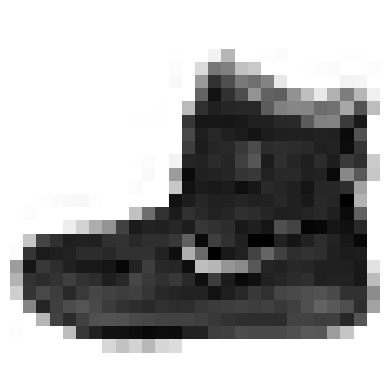

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# 추가 코드

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

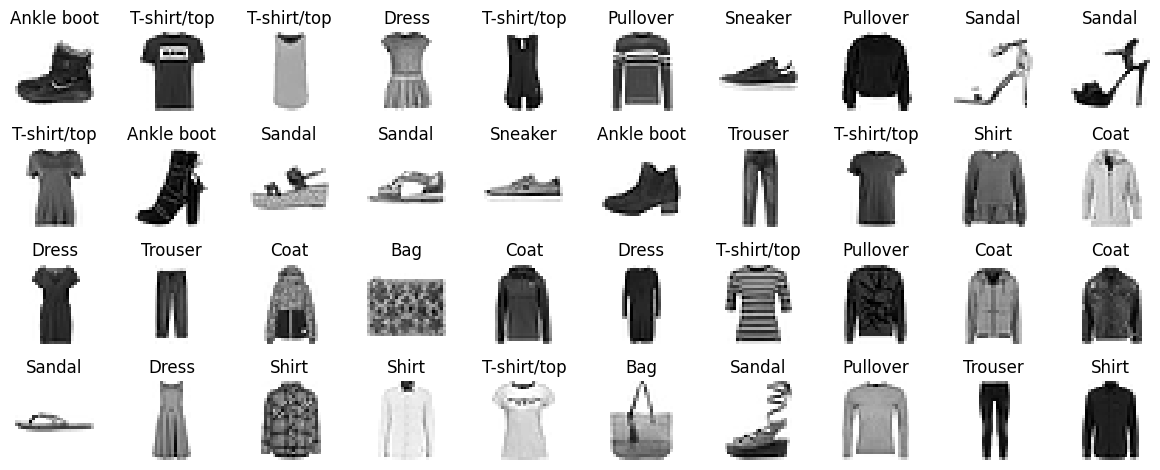

In [9]:
y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

# 추가 코드 - 이 셀은 그림 10-10을 생성하고 저장합니다.

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# TensorFlow 및 필요한 모듈 임포트
import tensorflow as tf

# TensorFlow 세션 초기화 및 시드 설정
tf.keras.backend.clear_session()  # 세션 초기화
tf.random.set_seed(42)  # 시드 설정

# Sequential 모델 생성: 이미지를 1차원으로 평탄화(Flatten)한 후에 Dense 레이어로 연결된 신경망
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),  # 입력 이미지를 1차원으로 평탄화
    tf.keras.layers.Dense(300, activation="relu"),  # 300개의 뉴런을 가진 은닉층 (ReLU 활성화 함수 사용)
    tf.keras.layers.Dense(100, activation="relu"),  # 100개의 뉴런을 가진 은닉층 (ReLU 활성화 함수 사용)
    tf.keras.layers.Dense(10, activation="softmax")  # 출력층: 10개의 클래스에 대한 확률을 출력 (Softmax 활성화 함수 사용)
])

# 모델 구조 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.layers

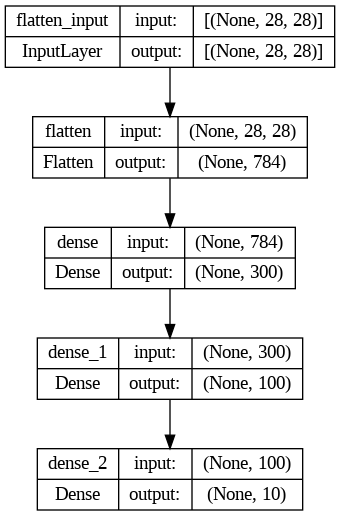

In [13]:
# 추가 코드 - 모델의 아키텍처를 표시하는 또 다른 방법
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04235965,  0.00668864,  0.05503808, ...,  0.00112905,
        -0.01023526,  0.07327171],
       [ 0.06368434, -0.06340696,  0.03559955, ..., -0.00831448,
        -0.0051424 , -0.04482356],
       [-0.07000828, -0.00885229,  0.07192068, ..., -0.01812466,
        -0.03371068, -0.01048479],
       ...,
       [ 0.0110424 ,  0.02594418,  0.04534464, ...,  0.07272825,
         0.05891344, -0.06584646],
       [ 0.02443749,  0.02158869, -0.02547353, ...,  0.00208634,
        -0.06919209,  0.02044788],
       [-0.00889082, -0.06612262,  0.05525388, ...,  0.06134693,
         0.05686349,  0.01395258]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape


(300,)

In [20]:
#모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#모델 훈련 및 평가
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
#낮을수록
#loss=훈련손실 ,val_loss=검증손실
#높을 수록
#accuracy=훈련 정확도, val_accuracy=검증 정확도
#왜 별 차이가 없을까

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.0994
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.0934
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1016
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.0934
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0900
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3026 - val_accur

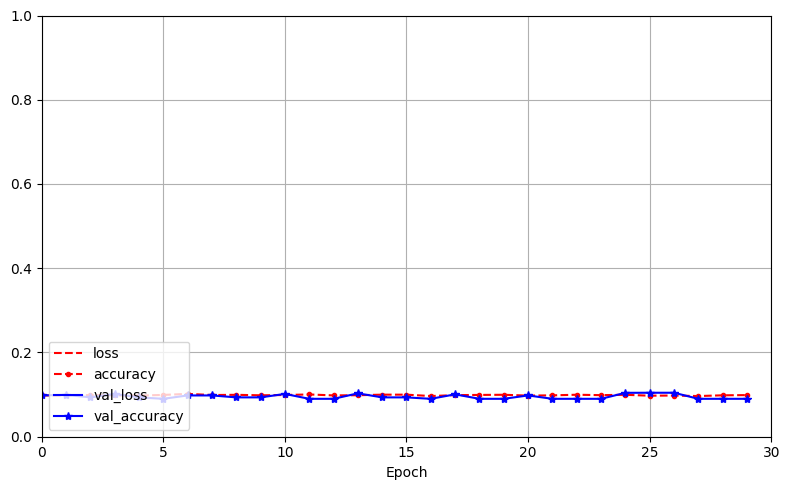

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 30], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # 추가 코드
save_fig("keras_learning_curves_plot")  # 추가 코드
plt.show()

In [8]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)